In [1]:
from os.path import join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_dir = 'data'
qog_dataset_filename = 'qog_std_ts_jan22.csv'
df = pd.read_csv(join(data_dir, qog_dataset_filename), low_memory=False)

In [4]:
df.info(verbose=True, memory_usage='deep', show_counts=True)
df.describe()
corr = df.corr(numeric_only=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15168 entries, 0 to 15167
Data columns (total 1913 columns):
 #     Column                  Non-Null Count  Dtype  
---    ------                  --------------  -----  
 0     ccode                   15168 non-null  int64  
 1     cname                   15168 non-null  object 
 2     year                    15168 non-null  int64  
 3     ccode_qog               15168 non-null  int64  
 4     cname_qog               15168 non-null  object 
 5     ccodealp                15168 non-null  object 
 6     ccodecow                14511 non-null  float64
 7     version                 15168 non-null  object 
 8     cname_year              15168 non-null  object 
 9     ccodealp_year           15168 non-null  object 
 10    aid_cpnc                1066 non-null   float64
 11    aid_cpsc                1066 non-null   float64
 12    aid_crnc                5775 non-null   float64
 13    aid_crnio               6231 non-null   float64
 14    ai

<AxesSubplot:>

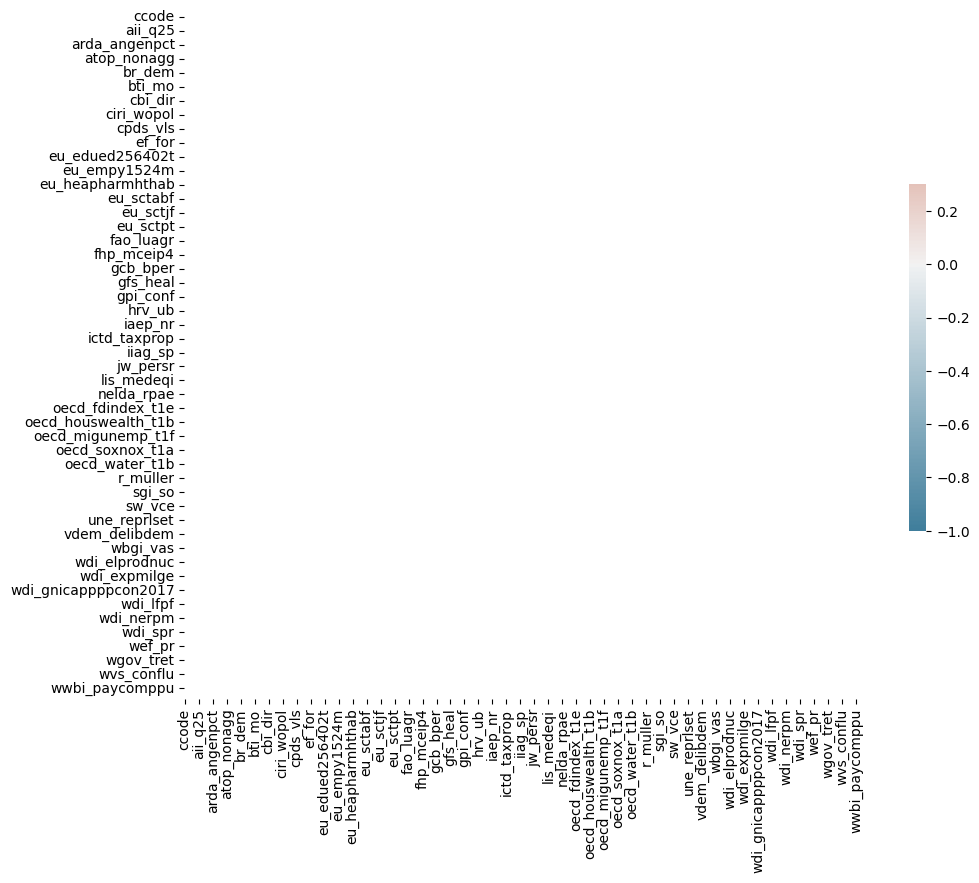

In [ ]:

#display(df[df.ccode != df.ccode_qog].groupby('cname').mean())
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

count    10350.000000
mean         0.474636
std          0.295443
min          0.002000
25%          0.197000
50%          0.493000
75%          0.741000
max          0.968000
Name: vdem_corr, dtype: float64

                bci_bci    ti_cpi  vdem_corr  vdem_execorr  vdem_jucorrdc  \
bci_bci        1.000000 -0.912940   0.804367      0.739014      -0.798515   
ti_cpi        -0.912940  1.000000  -0.895395     -0.840276       0.852094   
vdem_corr      0.804367 -0.895395   1.000000      0.942694      -0.910916   
vdem_execorr   0.739014 -0.840276   0.942694      1.000000      -0.795088   
vdem_jucorrdc -0.798515  0.852094  -0.910916     -0.795088       1.000000   
vdem_pubcorr   0.765243 -0.887590   0.933897      0.899141      -0.806196   
wbgi_cce      -0.907266  0.988562  -0.902145     -0.859260       0.857433   
ti_cpi_om     -0.925231       NaN  -0.856190     -0.814588       0.839389   
gle_cgdpc     -0.665130       NaN  -0.352860     -0.313876       0.374522   

               vdem_pubcorr  wbgi_cce  ti_cpi_om  gle_cgdpc  
bci_bci            0.765243 -0.907266  -0.925231  -0.665130  
ti_cpi            -0.887590  0.988562        NaN        NaN  
vdem_corr          0.933897 -0.902145  -0.8

/tmp/ipykernel_63634/2598201300.py:41: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  .set_precision(2)\


,bci_bci,ti_cpi,vdem_corr,vdem_execorr,vdem_jucorrdc,vdem_pubcorr,wbgi_cce,ti_cpi_om,gle_cgdpc
bci_bci,1.00,-0.91,0.80,0.74,-0.80,0.77,-0.91,-0.93,-0.67
ti_cpi,-0.91,1.00,-0.90,-0.84,0.85,-0.89,0.99,nan,nan
vdem_corr,0.80,-0.90,1.00,0.94,-0.91,0.93,-0.90,-0.86,-0.35
vdem_execorr,0.74,-0.84,0.94,1.00,-0.80,0.90,-0.86,-0.81,-0.31
vdem_jucorrdc,-0.80,0.85,-0.91,-0.80,1.00,-0.81,0.86,0.84,0.37
vdem_pubcorr,0.77,-0.89,0.93,0.90,-0.81,1.00,-0.88,-0.83,-0.35
wbgi_cce,-0.91,0.99,-0.90,-0.86,0.86,-0.88,1.00,0.97,0.69
ti_cpi_om,-0.93,nan,-0.86,-0.81,0.84,-0.83,0.97,1.00,0.75
gle_cgdpc,-0.67,nan,-0.35,-0.31,0.37,-0.35,0.69,0.75,1.00


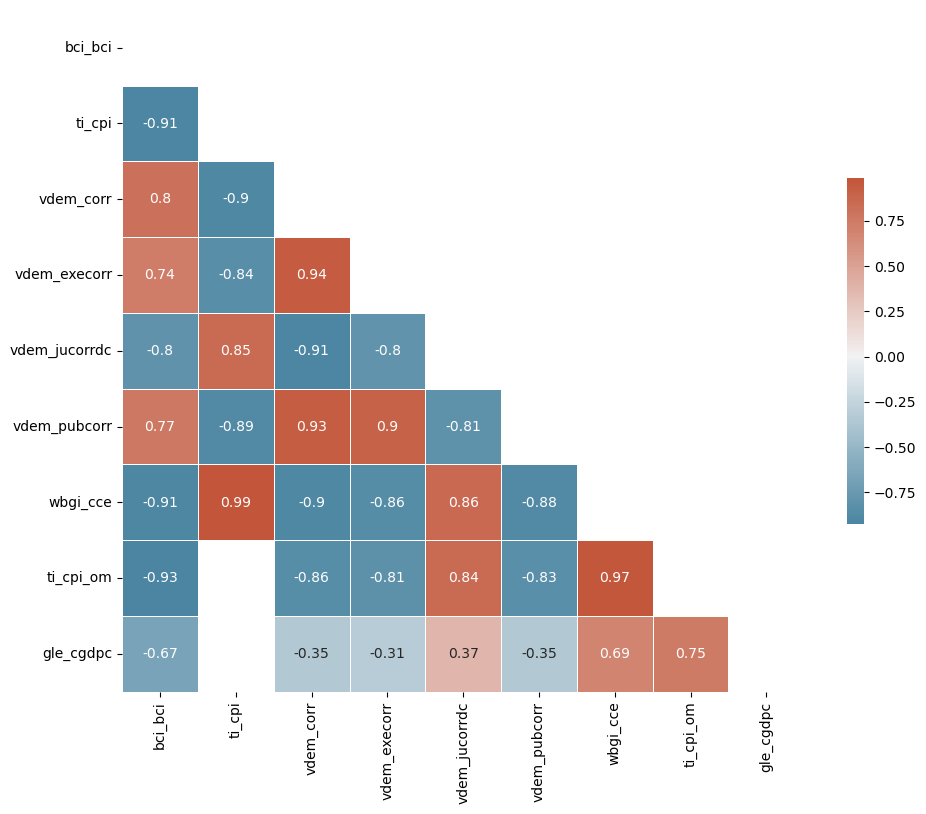

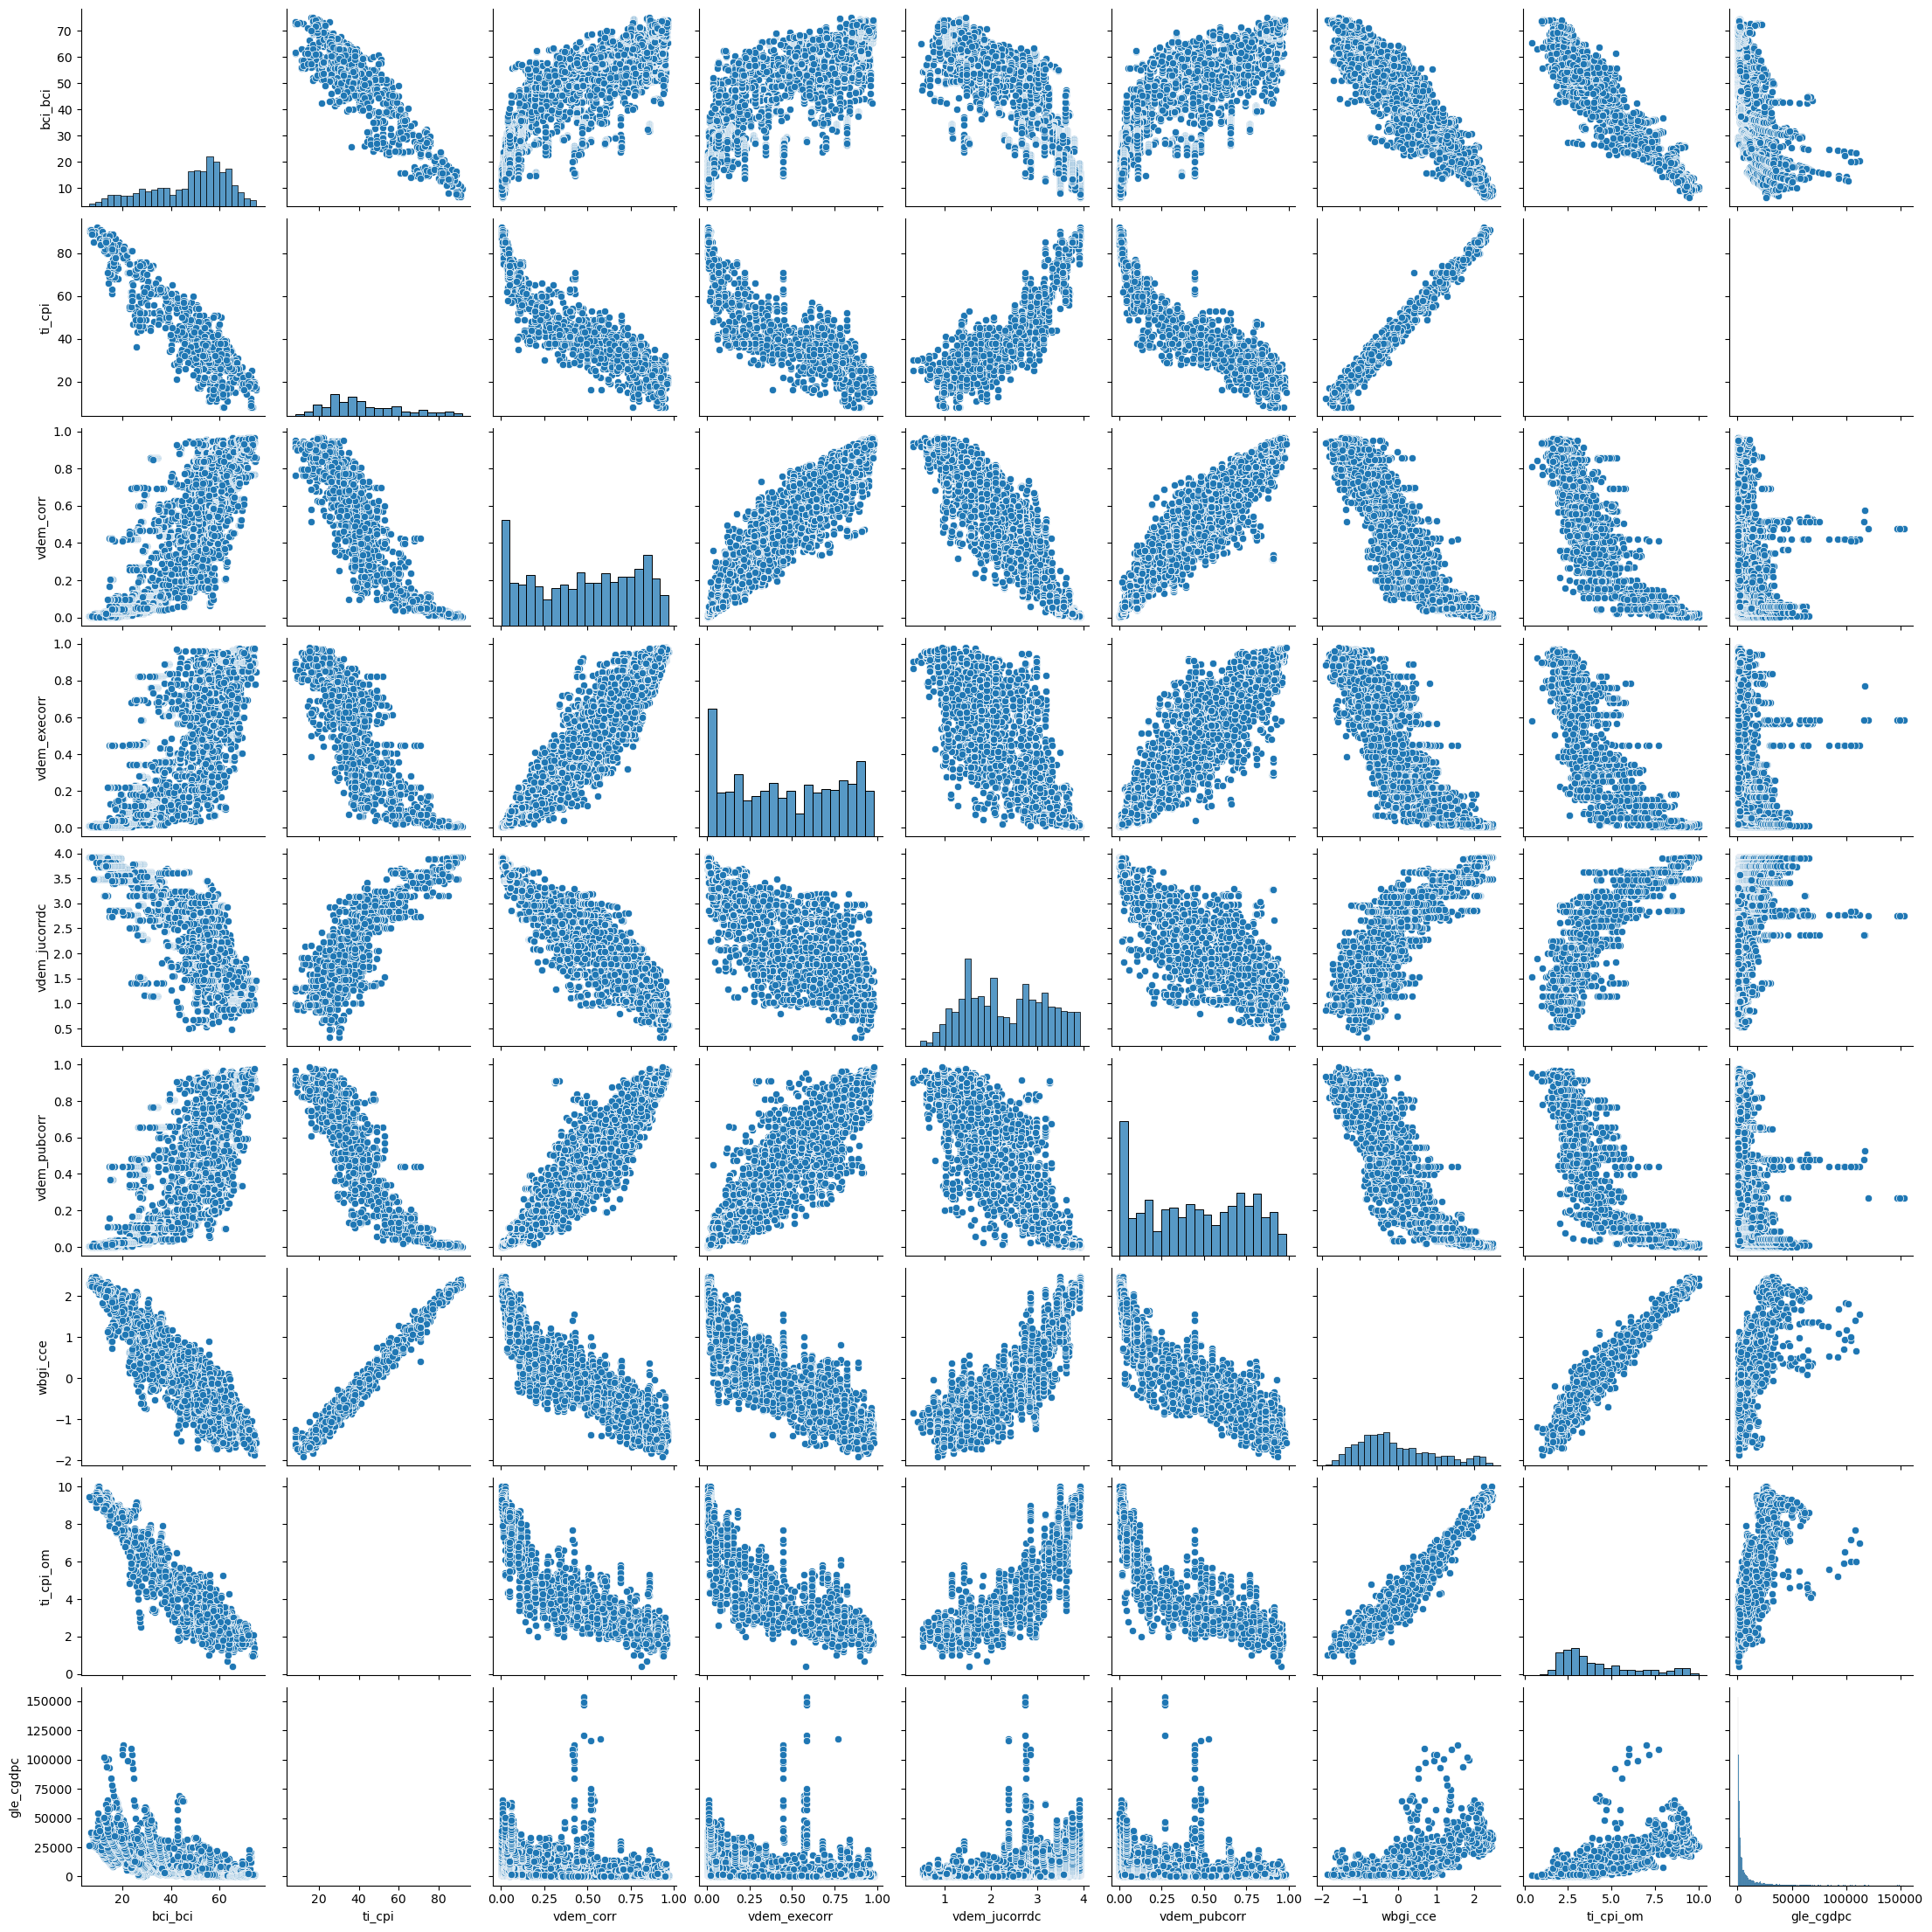

In [12]:
display(df.vdem_corr.describe())

df[df.cname=='Sudan'].vdem_corr

corr = df[['bci_bci', 'ti_cpi', 'vdem_corr', 'vdem_execorr', 'vdem_jucorrdc', 'vdem_pubcorr', 'wbgi_cce', 'ti_cpi_om', 'gle_cgdpc']].corr()
print(corr)

#display(df[df.ccode != df.ccode_qog].groupby('cname').mean())
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

sns.pairplot(df[['bci_bci', 'ti_cpi', 'vdem_corr', 'vdem_execorr', 'vdem_jucorrdc', 'vdem_pubcorr', 'wbgi_cce', 'ti_cpi_om', 'gle_cgdpc']])

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

In [54]:
def drop_values(df, min_year, max_year, min_percentage_non_nan):
    df = df[(df.year >= min_year) & (df.year <= max_year)]
    rows = df.shape[0]
    threshold = min_percentage_non_nan * rows
    print(threshold)
    return df.dropna(axis=1, thresh=threshold)
    #TODO function that automatically removes rows where corruption index nan
    #TODO check number of unique vals compared to number of non val values
    

In [72]:
display(drop_values(df, 1995, 2021 , .5))
display()
df[~df.ti_cpi_om.isna()].to_csv('aaa.csv')
display(df[~df.wbgi_cce.isna()].wbgi_cce)

2673.0


,ccode,cname,year,ccode_qog,cname_qog,ccodealp,ccodecow,version,cname_year,ccodealp_year,...,who_infmortm,who_infmortt,who_matmort,who_mrf,who_mrm,who_mrt,who_roadtrd,who_suif,who_suim,who_suit
49,4,Afghanistan,1995,4,Afghanistan,AFG,700.0,QoGStdTSjan22,Afghanistan 1995,AFG95,...,109.2,103.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,4,Afghanistan,1996,4,Afghanistan,AFG,700.0,QoGStdTSjan22,Afghanistan 1996,AFG96,...,106.3,100.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,4,Afghanistan,1997,4,Afghanistan,AFG,700.0,QoGStdTSjan22,Afghanistan 1997,AFG97,...,103.5,98.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,4,Afghanistan,1998,4,Afghanistan,AFG,700.0,QoGStdTSjan22,Afghanistan 1998,AFG98,...,100.7,95.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,4,Afghanistan,1999,4,Afghanistan,AFG,700.0,QoGStdTSjan22,Afghanistan 1999,AFG99,...,98.0,92.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15076,994,Tibet,2017,994,Tibet,XTI,NaN,QoGStdTSjan22,Tibet 2017,XTI17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15077,994,Tibet,2018,994,Tibet,XTI,NaN,QoGStdTSjan22,Tibet 2018,XTI18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15078,994,Tibet,2019,994,Tibet,XTI,NaN,QoGStdTSjan22,Tibet 2019,XTI19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15079,994,Tibet,2020,994,Tibet,XTI,NaN,QoGStdTSjan22,Tibet 2020,XTI20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


50      -1.291705
52      -1.180848
54      -1.295380
56      -1.263366
57      -1.351042
           ...   
14933   -0.401749
14934   -0.543755
14935   -0.650720
14936   -0.644526
14937   -0.704854
Name: wbgi_cce, Length: 4169, dtype: float64